<a href="https://colab.research.google.com/github/rahil161190/Aerofit-Case-Study/blob/main/Aerofit_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

! wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749.csv

--2025-03-03 04:24:19--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.11, 18.239.15.127, 18.239.15.217, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-03-03 04:24:20 (187 MB/s) - ‘aerofit_treadmill.csv?1639992749.csv’ saved [7279/7279]



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv?1639992749.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Q-1,2 Defining Problem Statement and Analysing basic metrics? and Non-Graphical Analysis: Value counts and unique attributes
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
df.shape

(180, 9)

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Insights


*   Mean age of the all the person using these treadmill is 29.
*   Minimum age is 18 and maximum age is 50.
*   75 percentile customer expects run/walk for 114.
*   75 percentile customer use 4 times treadmill in a week









In [ ]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
np.round((df['Product'].value_counts()/len(df))*100,2)

,count
Product,
KP281,44.44
KP481,33.33
KP781,22.22


Insights


*   KP281 is the most selling product i.e 44% of all products whereas KP781 was the least i.e 22% of all products.

In [ ]:
np.round((df['Gender'].value_counts()/len(df))*100,2)

,count
Gender,
Male,57.78
Female,42.22


Insights


*   Male Contribution in using these produces is 58% whereas for women it is 43%

In [ ]:
np.round((df['MaritalStatus'].value_counts()/len(df))*100,2)

,count
MaritalStatus,
Partnered,59.44
Single,40.56


Insights


*   60% products used by people are married/partnered and only 40% are single

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


No missing data

In [ ]:
df.loc[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


There are no duplicated rows.

In [ ]:
# making a new income_category column
temp_bin = [29000,40000,60000,80000,110000]
temp_lbls = ['low','medium','high','very_high']
df['Income_Category'] = pd.cut(df['Income'],bins = temp_bin,labels = temp_lbls )

In [ ]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category
0,KP281,18,Male,14,Single,3,4,29562,112,low
1,KP281,19,Male,15,Single,2,3,31836,75,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low
3,KP281,19,Male,12,Single,3,3,32973,85,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low
5,KP281,20,Female,14,Partnered,3,3,32973,66,low
6,KP281,21,Female,14,Partnered,3,3,35247,75,low
7,KP281,21,Male,13,Single,3,3,32973,85,low
8,KP281,21,Male,15,Single,5,4,35247,141,low
9,KP281,21,Female,15,Partnered,2,3,37521,85,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    object  
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    object  
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    object  
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   Income_Category  180 non-null    category
dtypes: category(1), int64(6), object(3)
memory usage: 13.2+ KB


In [ ]:
np.round((df['Income_Category'].value_counts()/len(df))*100,2)

,count
Income_Category,
medium,58.89
low,17.78
high,12.78
very_high,10.56


Insights


*   Most of the products used by are from medium range of salary (i.e 40k$-60k$)

# Q-3 Visual Analysis - Univariate & Bivariate

In [ ]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,binom
from scipy.stats import poisson
from scipy.stats import geom,expon

Q:- Features like Income_Category have any effect on the product purchased?

<Axes: xlabel='Product', ylabel='count'>

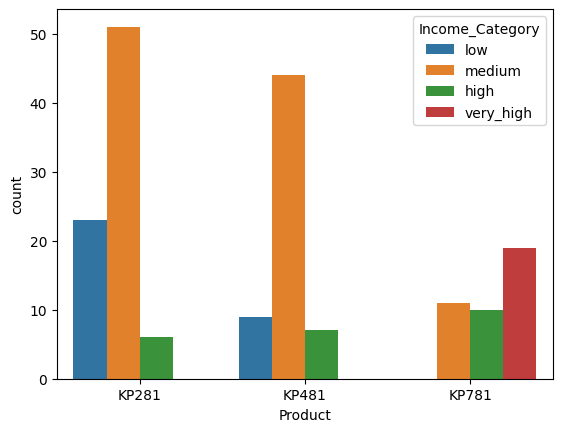

In [ ]:
sns.countplot(data=df,x='Product',hue = 'Income_Category')

Insights

*   Medium Income customer are buying KP281 and KP481 as it is affordable to them.
*   There are few customers of medium income category using KP781 product.
*   Very_high income category customers are using KP781.











Q:- Features like Usage have any effect on the product purchased?

<Axes: xlabel='Product', ylabel='count'>

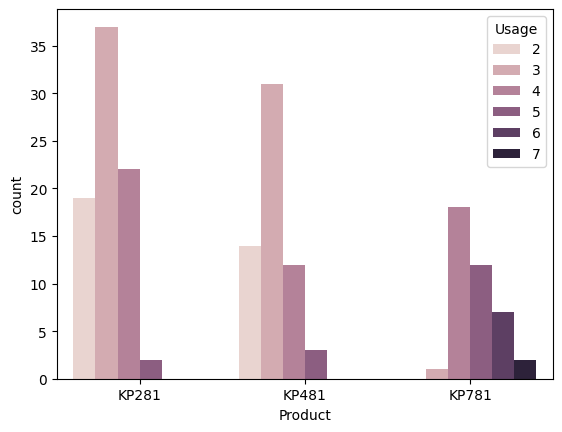

In [ ]:
sns.countplot(data=df,x='Product',hue = 'Usage')

Insights

*   3 times Usage/week for the product KP281,KP481 is higher than KP781 usage.
*   We can infer that KP781 usage/week in totality is much higher than rest of the products.










Q:- How the Products quality is affecting fitness level of customers ?

<Axes: xlabel='Product', ylabel='count'>

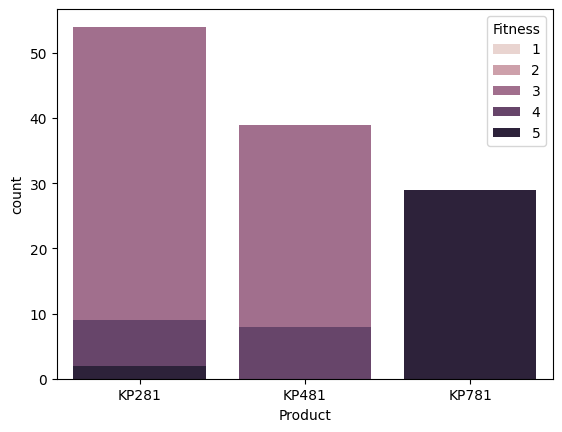

In [ ]:
sns.countplot(data=df,x='Product',hue = 'Fitness',dodge = False)

Insights

*   For products KP281 most customers rank their fitness 3 while for KP781 is 5.
*   So customers who are using 781 are more fitter than other customers using 281,481.











Q:- How the Products quality is affecting Usage/week of customers ?

<Axes: xlabel='Product', ylabel='count'>

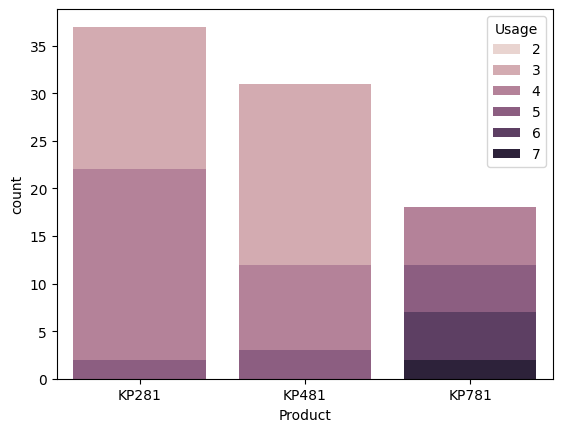

In [ ]:
sns.countplot(data=df,x='Product',hue = 'Usage',dodge = False)

Insights

*   For products KP281 most customers are using 2-3 times/week.
*   Whereas customers who are using KP781 are able to use comfortably 3-7 times/week i.e product KP781 is customer friendly.











Q:- How the Products quality is affecting fitness level of customers ?

<Axes: xlabel='Usage', ylabel='count'>

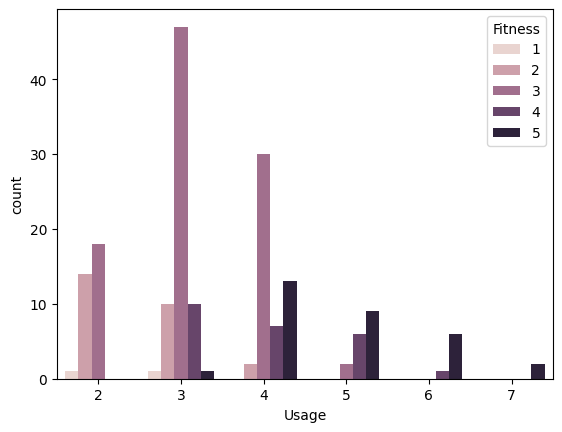

In [ ]:
sns.countplot(data=df,x='Usage',hue = 'Fitness')

Insights

*   Customers who are using 4times and more in a week are having higher fitness level.
*   Usage/week is directly connected to fitness level i.e more the usage more the fitness level.


<Axes: title={'center': 'Product vs Income'}, xlabel='Product', ylabel='Income'>

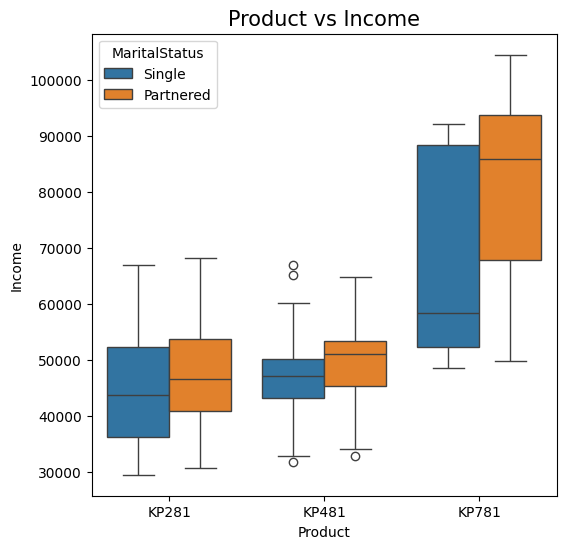

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Product vs Income',fontsize =15)
sns.boxplot(x='Product', y='Income',data= df,hue = 'MaritalStatus')


*   The KP281 is an entry-level treadmill that sells for $1,500.

*   The KP481 is for mid-level runners that sell for $1,750.

*   The KP781 treadmill is having advanced features that sell for $2,500

Insights

*   Higher Income people are buying KP781 as it is affordable to them and spread of income is also higher than other products.
*   There are few outlier in KP481 that are having salary in range 65k$-70k$.
*   Low income customer are using KP281. There are few outliers in KP481 whom income is low but still using KP481.
*   For products KP781, spread of income for single customers is higher than married.
*   We can observe that spread of income for product KP781 is much larger than others.
*   KP281 and KP481 is targeting specific customers with salary below 50k$





Q:- Is the variance of income in lower ages  is smaller as compared to variance in higher age?


Salary with categories.

*   29k$-40k$ is low.
*   40k$-60k$ is medium.
*   60k$-80k$ is high
*   80k$-110k$ is very high

<Axes: title={'center': 'age vs Income'}, xlabel='Income_Category', ylabel='Age'>

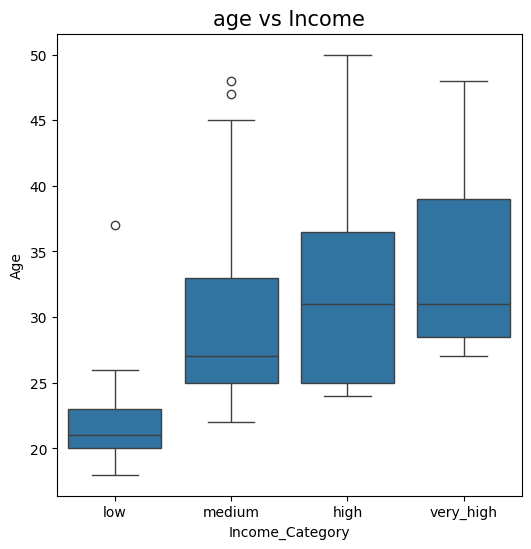

In [ ]:
plt.figure(figsize=(6,6))
plt.title('age vs Income',fontsize =15)
sns.boxplot(y='Age', x='Income_Category',data= df)

Ans :- Yes, this is because in lower age salary is not high. Although there is an outlier whose age is above 35 but with low_income.
A 'high' & 'very high' income category are spreaded with age.

Q:- If features like marital status, age have any effect on the product purchased

<Axes: title={'center': 'Product vs Age'}, xlabel='Product', ylabel='Age'>

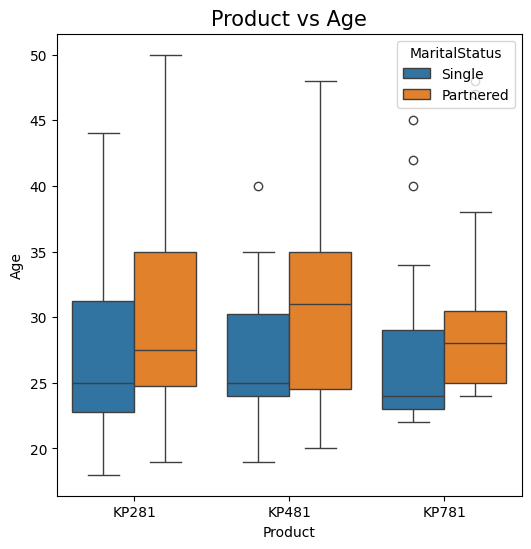

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Product vs Age',fontsize =15)
sns.boxplot(x='Product', y='Age',data= df,hue = 'MaritalStatus')

Insights

*   For products like KP281,KP481 spread of age is higher than KP781 i.e different age group are using these products.
*   Customer at early age buys KP281 product because it is cheap also.
*   There are few outlier in KP781 that of the age 40 and are single in marital status.
*   Customers who are married are highly spreaded across ages compare to single.

Q:- Distribution of product type across ages and miles?

<Axes: xlabel='Age', ylabel='Miles'>

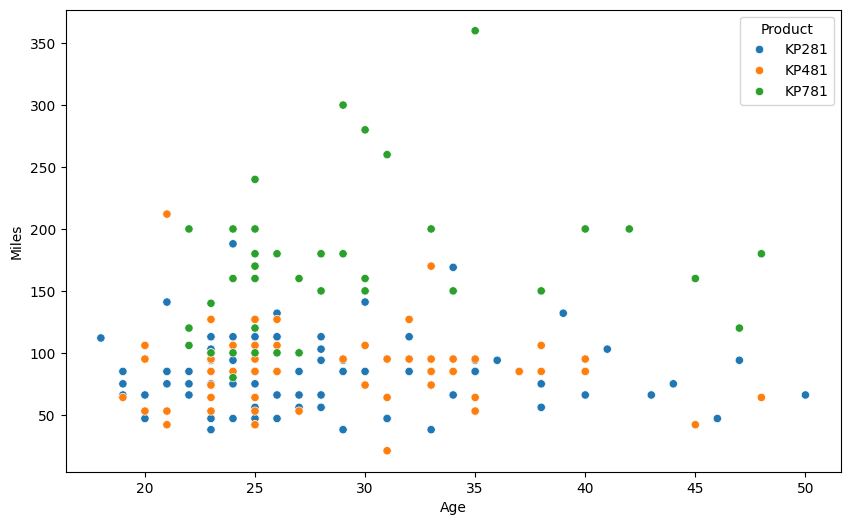

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df ,x='Age',y='Miles',hue = 'Product')

Insights

*   KP781 is performing well in terms of average number of miles and it is spread across ages. So product KP781 is outperforming compare to other products in terms of performance this may be because of higher usage of product as showm above graphs.
*   Most of the concentration lies in the range of 50-150 miles and age of 20-35, so we can inference that customers with less than age(i.e 35) are able to run/walk more per week compare to older.

Q:- Distribution of Income_Category across ages and miles?

<Axes: xlabel='Age', ylabel='Miles'>

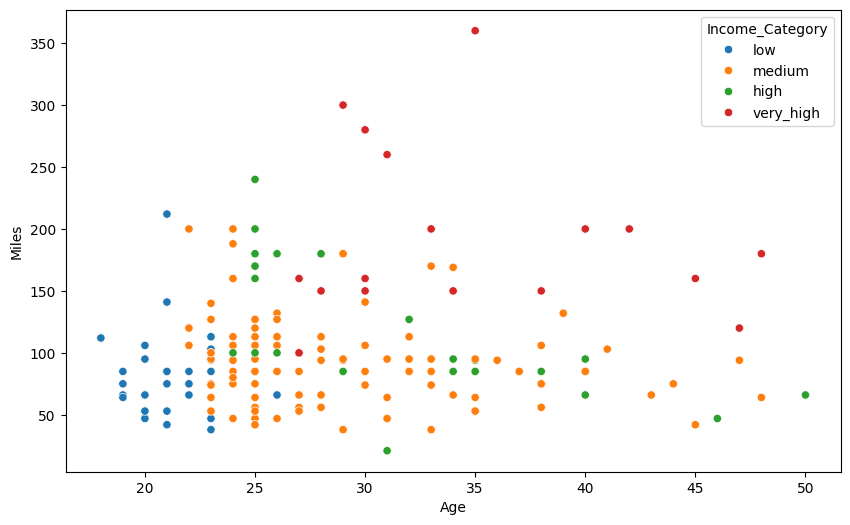

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age',y='Miles',hue = 'Income_Category')

Insights


*   Customers with 'very_high' and 'high' income are able to run/walk better than others because these customers are using KP781 and KP781 outperforms other products.
*   Customers with 'low' incomes have not performed well because these customers are using KP281 which is not giving satisfactory results as compare to other products.



Q:- Distribution of Fitness ranking across ages and miles?

<Axes: xlabel='Age', ylabel='Miles'>

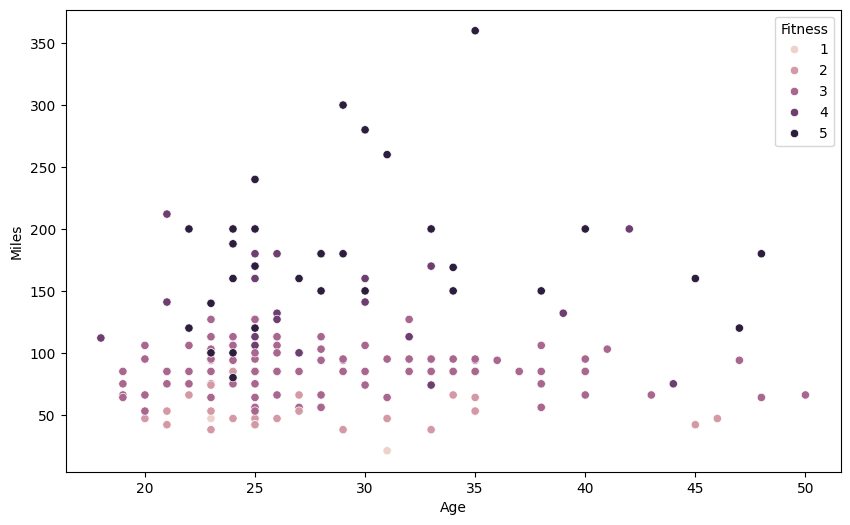

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age',y='Miles',hue = 'Fitness')

Insights

*   Customers who can walk/run above  160miles shows high fitness scale rating i.e 5. So this is directly in related to each other.


Q:- Top 3 features having the highest corelation with the product columns?

In [ ]:
df_1 = df[['Age','Education','Usage','Fitness','Miles','Income']]
df_1

,Age,Education,Usage,Fitness,Miles,Income
0,18,14,3,4,112,29562
1,19,15,2,3,75,31836
2,19,14,4,3,66,30699
3,19,12,3,3,85,32973
4,20,13,4,2,47,35247
...,...,...,...,...,...,...
175,40,21,6,5,200,83416
176,42,18,5,4,200,89641
177,45,16,5,5,160,90886
178,47,18,4,5,120,104581


<Axes: >

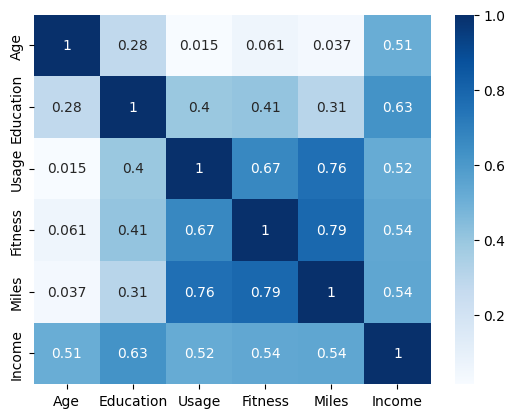

In [ ]:
sns.heatmap(df_1.corr(), cmap= "Blues",
annot=True)

Insights

*   High corelation among usage,fitness and miles.
*   Higher usage of products shows high fitness ranking and also higher miles able to run/walk.
*   Age has no corelation with usage,fitness and miles i.e as the age has no influence on the customer usage and miles.
*   Education and Income is highly corelated because highly educated person earns more.
*   Income and miles/fitness/usage are also adequately corelated this is because high_incom group customers are using KP781 and this product is giving amazing results in terms fitness/miles/usage.

Q:- Corelation and distribution of age and income with respect to marital status ?

<Axes: xlabel='Age', ylabel='Income'>

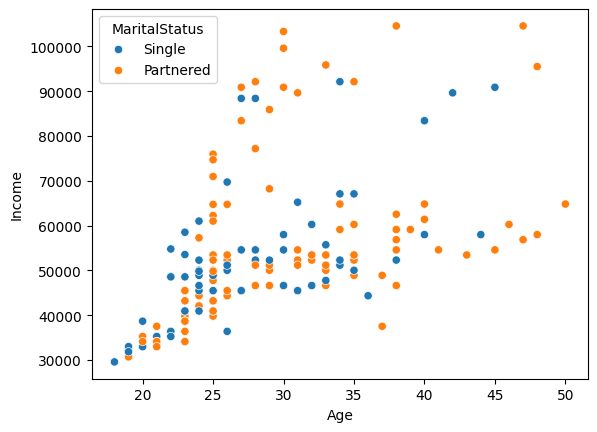

In [ ]:
sns.scatterplot(data=df,x='Age',y='Income',hue = 'MaritalStatus')

<Axes: xlabel='Education', ylabel='count'>

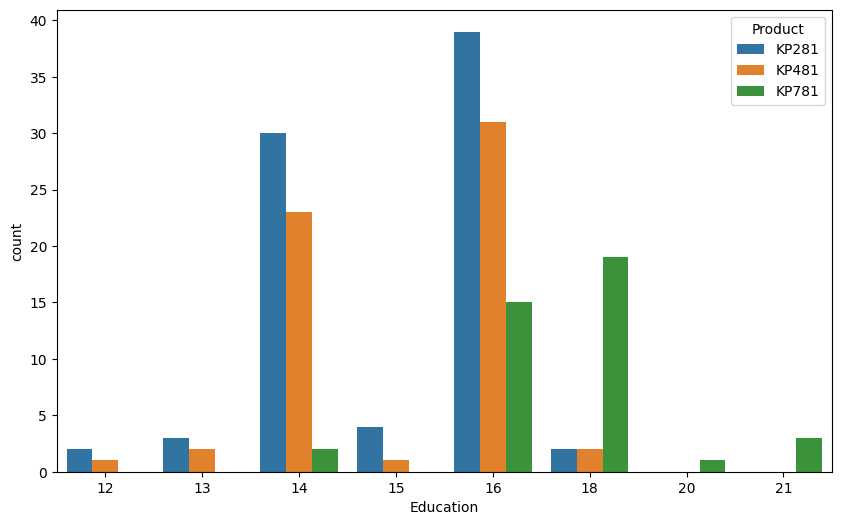

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Education',hue = 'Product')

# **Representing the Probability**

Q:- Describe the Product and gender distribution of all the customers?

In [ ]:
np.round(pd.crosstab(index=df['Product'],
            columns=df['Gender'],
            normalize = 'index'),2)

Gender,Female,Male
Product,,
KP281,0.50,0.50
KP481,0.48,0.52
KP781,0.18,0.82


Conclusion:

*   Probability of a randomly selected KP781 buyer being Male is 82%.
*   Probability of a randomly selected KP281 buyer being Male & Female are 50%



Q:- What proportion of women have bought KP781?

Ans: - Female customer buying KP781 is 18% and reason can be "very high salary" of female customer are very low and can be seen in below graphs.

<Axes: title={'center': 'Product vs Income'}, xlabel='Product', ylabel='count'>

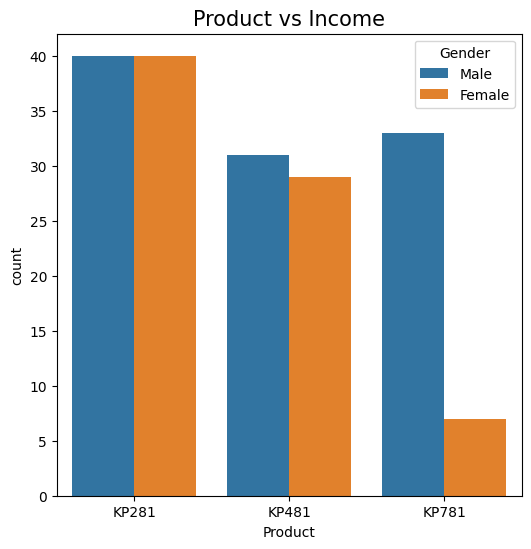

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Product vs Income',fontsize =15)
sns.countplot(x='Product',data= df,hue = 'Gender')

Q:- What proportion of Male and Female with respect to income_category?

<Axes: title={'center': 'Product vs Income'}, xlabel='Gender', ylabel='count'>

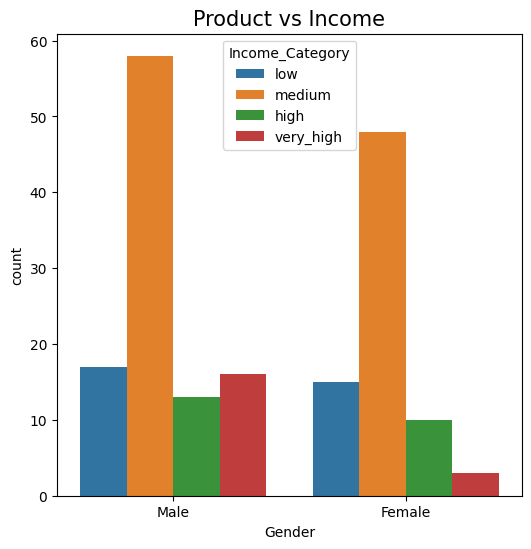

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Product vs Income',fontsize =15)
sns.countplot(x='Gender',data= df,hue = 'Income_Category')

Conclusion:

*   Customers who are female and income of very_high salary category is very low.
*   Customers who are Male and income of very_high salary category is high.
*   Whereas for low and medium salary category they are almost same.

Q:- Describe the Product and Income distribution of all the customers?

In [ ]:
np.round(pd.crosstab(index=df['Product'],
            columns=df['Income_Category'],
            normalize = 'columns'),2)

Income_Category,low,medium,high,very_high
Product,,,,
KP281,0.72,0.48,0.26,0.0
KP481,0.28,0.42,0.30,0.0
KP781,0.00,0.10,0.43,1.0


Conclusion:
Conditional probablity

*   Probablity of customers using KP781 is 100% given that customers are of 'very_high' income category.
*   Probablity of customers using KP481 is 42% given that customers are of 'medium' income category.
*   Probablity of customers using KP281 is 72% given that customers are of 'low' income category.







Q:- Describe the Product and Fitness level distribution of all the customers?

In [ ]:
np.round(pd.crosstab(index=df['Product'],
            columns= df['Fitness'],
            normalize = 'index'),2)

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.01,0.18,0.68,0.11,0.02
KP481,0.02,0.20,0.65,0.13,0.00
KP781,0.00,0.00,0.10,0.18,0.72


In [ ]:
np.round(pd.crosstab(index=df['Product'],
            columns=df['Fitness'],
            normalize = 'columns'),2)

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.54,0.56,0.38,0.06
KP481,0.5,0.46,0.40,0.33,0.00
KP781,0.0,0.00,0.04,0.29,0.94


Conclusion:
Conditional probablity


*   There is 94% chance product is KP781 given the customers are having 5 as the fitness ranking.
*   There is 56% chance product is KP281 given the customers are having 3 as the fitness ranking.
*   Low ratings customers i.e 1 are using product of KP281,KP481 equally 50%


Q:- Overall contribution of products?

In [ ]:
np.round(pd.crosstab(index=df['Product'],
            columns='count',
            normalize = 'columns'),2)

col_0,count
Product,
KP281,0.44
KP481,0.33
KP781,0.22


Conclusion:
Overall probablity/Marginal probablity

*   Probability of a randomly selected KP781 buyer is 22%.
*   Probability of a randomly selected KP481 buyer is 33%.
*   Probability of a randomly selected KP281 buyer is 44%.


Q:- Marital Status implies no significant  information on the usage of different product/treadmill? (T/F)

In [ ]:
np.round(pd.crosstab(index=df['Product'],
            columns=df['MaritalStatus'],
            normalize = 'index'),2)

MaritalStatus,Partnered,Single
Product,,
KP281,0.60,0.40
KP481,0.60,0.40
KP781,0.57,0.42


Ans:- Yes there is no significant influence of any product to single or married customers. However married customers are buying more compare to single across type of products.

Q:- Marital Status contribution?

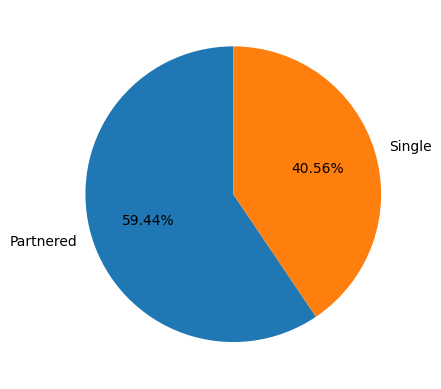

In [ ]:
plt.pie(
    df['MaritalStatus'].value_counts(),
    labels =df_2.index,
    autopct = '%.2f%%',
    startangle = 90
)
plt.show()

Insights:
Married customer are buying more product.

## Q-4 Missing Value & Outlier Detection

In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0
Income_Category,0


No missing value in the data frame.

<Axes: xlabel='Product', ylabel='Age'>

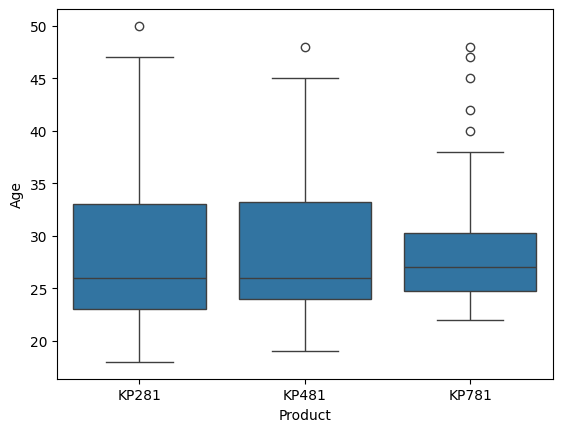

In [ ]:
sns.boxplot(x='Product', y='Age',data= df)

In [ ]:
np.percentile(df['Age'],25), np.percentile(df['Age'],75)

(24.0, 33.0)

In [ ]:
df['Age'].min(),df['Age'].max()

(18, 50)


*   50% percentage data of customer lies in the age of 24-33. IQR inter quartile range is 9.
*   Min age is 18 and max age is 50.

In [ ]:
np.percentile(df['Income'],25), np.percentile(df['Income'],75)

(44058.75, 58668.0)

In [ ]:
df['Income'].min(),df['Income'].max()

(29562, 104581)


*   Min income is 29Kdollar and max age is 100K dollar.
*   50% percentage data of customer lies in the income range of 44k$-59k$. IQR inter quartile range is 14kdollar.

In [ ]:
np.percentile(df['Miles'],25), np.percentile(df['Miles'],75)

(66.0, 114.75)

In [ ]:
df['Miles'].min(),df['Miles'].max()

(21, 360)


*   Min miles is 21 and max miles is 360.
*   50% percentage data of customer has walk/run in the range of 66-115miles/week. IQR inter quatile range is 49miles/week.

## Q-5 Business Insights based on Non-Graphical and Visual Analysis

## Customer Profiling

# KP781

**Charateristics of target audience.**
*   Company majorly should focus on customers whom salaries are in high and very high category. Reason being these products are of high cost.
*   Data shows high and very high income category customers have age above 25 only as high age group earns more compare to lower age groups.
*   Probability of a randomly selected KP781 buyer being Male is 82%. So company should focus more on Male customer of this range of salaries.
*   To enhance female contribution towards product company should customise advertisment to the female gender showing the brighter side of the product.
*   Customers which are having goals much tougher and longer should be encourage to buy this product as this product has outperformed all the other products.
*   Company should focus on customers who are using treadmill for a longer time and want to enchance their experience and fitness level.



  

# KP281

**Charateristics of target audience.**


*   Comapny should target lower age group and lower and medium level income group of people as this is mostly suitable to them.
*   Major customer who are using KP281 are from medium income category so company should target this product to the specific audience of this characteristicvs.
*   Product is cheaper that is why lower age group customers will not hesitate to buy the product.
*   Company should focus on Male and female because. Probability of a randomly selected KP281 buyer being Male & Female are 50%.
*   Company should target the audience across the ages as there is no direct relation between age and the product.
*   Company should focus on beginner level customer who just started using any type of treamill.


# KP481
Charateristics of target audience.


*   Comapny should target lower and medium level income group of people as this is mostly suitable to them.
*   Company should target the audience across the ages as there is no direct relation between age and the product.
*   Major customer who are using KP481 are from medium income category so company should target this product to this customers.
*   Company should taget male and female both.


Across all the products major portion of customers are partnered i.e approx 60%

Insights:-

*   KP781 treadmill is outperforming in terms fitness and also usage/week is much higher than other products usage/week, this shows its strength,durability,consumer friendly and amazing features.
*   KP281,481 is not performing well in terms of fitness as compare to KP781.
*   Marital status has no major impact on different products although married customers are using more in totality.
*   Company should focus on beginner level customer who just started using any type of treamill.
*   KP281 and KP481 is targeting specific customers with salary
*   Higher usage of products shows high fitness ranking and also higher miles able to run/walk.
*   High corelation among usage,fitness and miles.
*   Income and miles/fitness/usage are also adequately corelated this is because high_incom group customers are using KP781 and this product is giving amazing results in terms fitness/miles/usage.
*   Customers who are using 4times and more in a week are having higher fitness level.


## Q-6 Recommendations

*   Company should enhance the performance,quality of KP281,kp481 and should use technology of KP781.
*   Price of KP781 can be lower down to increases its contribution to all the income_level group.
*   Usage of KP281,KP481 is approx 3-4 whereas for KP781 its 5-7 times in week so this shows a product 281,481 needs to be upgraded to a better quality.
*   Company should also target 'Female' customers with income high or very high category for the product KP781 because contribution is very low for females buying product.
*   Fitness enthusiast should be directed to buy product KP781.
*   Company should reduce KP481 price to same as KP281 as the performance is almost same among them, I dont see any distinguish results and target audience is also same.
